In [1]:
!python -V

Python 3.9.13


In [2]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
import pickle

In [4]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

from sklearn.pipeline import make_pipeline

In [5]:
def read_dataframe(filename):
    df = pd.read_parquet(filename)

    df['duration'] = df.lpep_dropoff_datetime - df.lpep_pickup_datetime
    df.duration = df.duration.dt.total_seconds() / 60

    df = df[(df.duration >= 1) & (df.duration <= 60)]

    categorical = ['PULocationID', 'DOLocationID']
    df[categorical] = df[categorical].astype(str)
    
    return df

In [6]:
data_train = 'https://d37ci6vzurychx.cloudfront.net/trip-data/green_tripdata_2022-01.parquet'
data_val = 'https://d37ci6vzurychx.cloudfront.net/trip-data/green_tripdata_2022-02.parquet'

df_train = read_dataframe(data_train)
df_val = read_dataframe(data_val)

In [7]:
len(df_train), len(df_val)

(59603, 66097)

In [8]:
target = 'duration'
y_train = df_train[target].values
y_val = df_val[target].values

In [9]:
categorical = ['PULocationID', 'DOLocationID']
numerical = ['trip_distance']

train_dicts = df_train[categorical + numerical].to_dict(orient='records')
val_dicts = df_val[categorical + numerical].to_dict(orient='records')

pipeline = make_pipeline(
    DictVectorizer(),
    LinearRegression()
)

pipeline.fit(train_dicts, y_train)
y_pred = pipeline.predict(val_dicts)

rmse = mean_squared_error(y_val, y_pred, squared=False)
print(rmse)

8.189327001824982


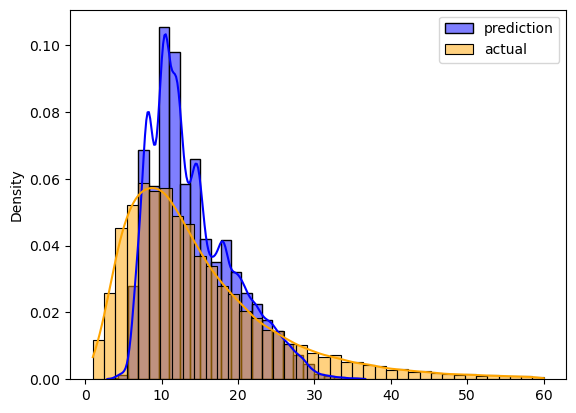

In [10]:
sns.histplot(y_pred, kde=True, stat="density", color='blue', bins=25, label='prediction')
sns.histplot(y_val, kde=True, stat="density", color='orange', bins=40, label='actual')

plt.legend()

In [12]:
with open('lin_reg.bin', 'wb') as f_out:
    pickle.dump(pipeline, f_out)